In [136]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt 
import gzip

from urllib.request import urlopen
from xmltodict import parse
from zipfile import ZipFile
from io import BytesIO

In [137]:
url_women = "https://api.worldbank.org/v2/en/indicator/SE.ADT.LITR.FE.ZS?downloadformat=xml"
url_child = "https://api.worldbank.org/v2/en/indicator/SH.DYN.MORT?downloadformat=xml"
url_gini = "https://api.worldbank.org/v2/en/indicator/SI.POV.GINI?downloadformat=xml"

file_women = "API_SE.ADT.LITR.FE.ZS_DS2_en_xml_v2_4651512.xml"
file_child = "API_SH.DYN.MORT_DS2_en_xml_v2_4639508.xml"
file_gini = "API_SI.POV.GINI_DS2_en_xml_v2_4639705.xml"

In [186]:
def reading(asd,file_n):
    url = urlopen(asd)
    zfile = ZipFile(BytesIO(url.read()))
    data = parse(zfile.open(file_n).read())
    deneme = [{x['@name']: x['#text'] for x in y['field'] if '#text' in x.keys()} for y in data['Root']['data']['record']]
    return pd.DataFrame(deneme).fillna(0)

In [187]:
WMN = reading(url_women,file_women)
CMR = reading(url_child,file_child)
GI = reading(url_gini,file_gini)

In [188]:
def GetValue(data, country):
    qlty = pd.DataFrame(data)
    years = qlty['Year'].astype(int)
    ctr = qlty[qlty['Country or Area'] == country]
    ctr['Value'] = ctr['Value'].astype(float)
    ctr['Year'] = ctr['Year'].astype(int)
    return pd.DataFrame(ctr)

In [189]:
countries = ['Turkiye','Greece','Bulgaria','Romania','Poland','Syrian Arab Republic','Iran, Islamic Rep.']

In [190]:
def plotting(country):
    wmn = GetValue(WMN,country)
    cmr = GetValue(CMR,country)
    gi = GetValue(GI,country)
    w1 = wmn[wmn['Country or Area'] == country]
    c1 = cmr[cmr['Country or Area'] == country]
    g1 = gi[gi['Country or Area'] == country]
    plt.figure(figsize = (12,5))
    plt.title(country)
    plt.xlabel("Year")
    plt.ylabel("Values")
    plt.plot(w1['Year'],w1['Value'],"-b", label="Women Literacy")
    plt.plot(c1['Year'],c1['Value'],"-g", label="Child Mortality")
    plt.plot(g1['Year'],g1['Value'],"-r", label="Gini Index")
    plt.legend(loc="upper left")

<ipython-input-188-4c0e7dadca02>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ctr['Value'] = ctr['Value'].astype(float)
<ipython-input-188-4c0e7dadca02>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ctr['Year'] = ctr['Year'].astype(int)
<ipython-input-188-4c0e7dadca02>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/

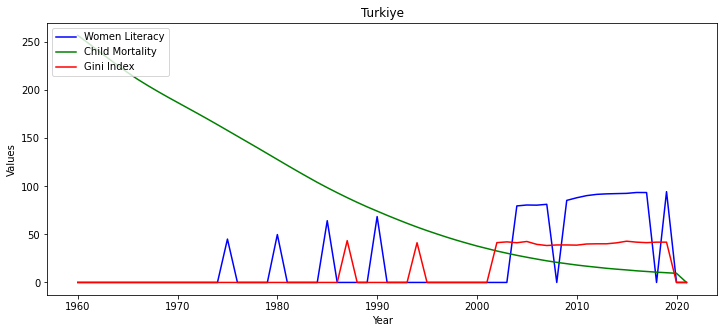

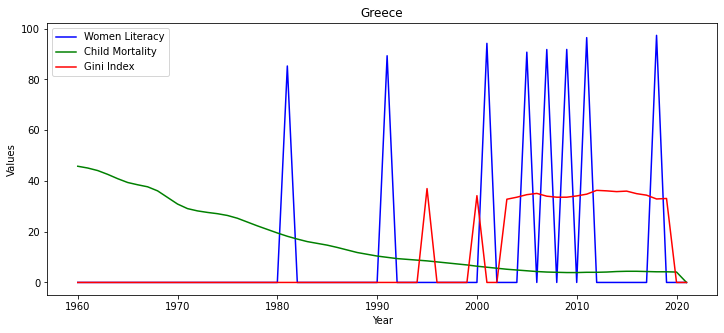

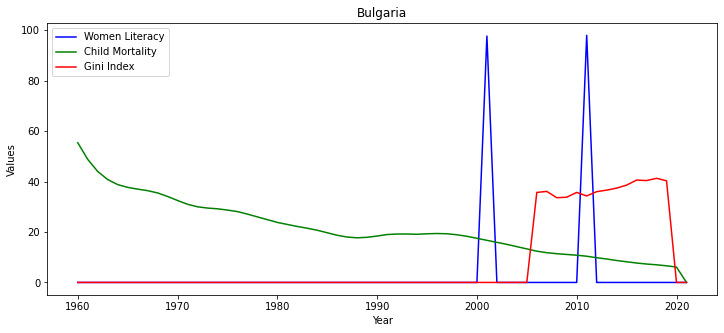

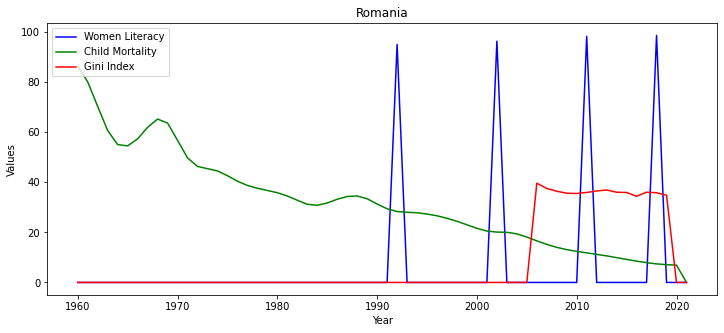

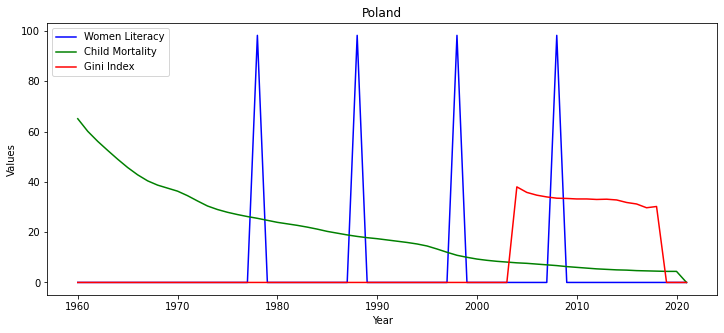

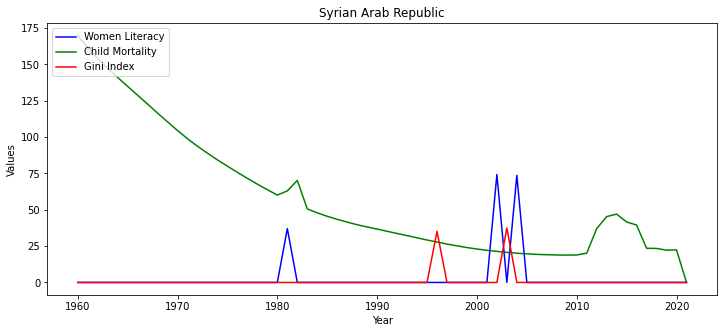

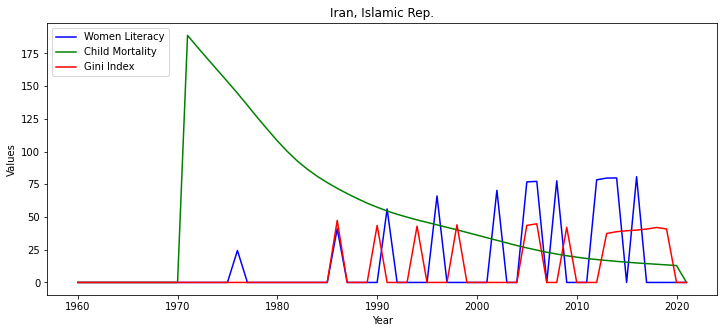

In [191]:
for i in countries:
    plotting(i)

In [192]:
wmn = pd.DataFrame(WMN)
w = wmn[wmn['Country or Area']=='Turkiye']
w['Value'] = w['Value'].astype(float)
cmr = pd.DataFrame(CMR)
c = cmr[cmr['Country or Area']=='Turkiye']
c['Value'] = c['Value'].astype(float)
gi = pd.DataFrame(GI)
g = gi[gi['Country or Area']=='Turkiye']
g['Value'] = g['Value'].astype(float)

<ipython-input-192-de31b81f2a4c>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  w['Value'] = w['Value'].astype(float)
<ipython-input-192-de31b81f2a4c>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  c['Value'] = c['Value'].astype(float)
<ipython-input-192-de31b81f2a4c>:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user

Text(0.5, 1.0, 'Female literacy rate against child mortality rate for Turkey')

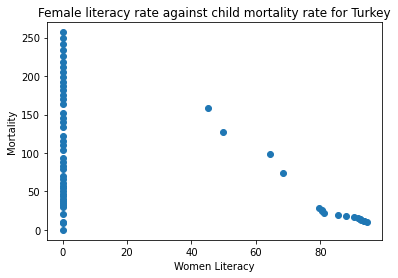

In [193]:
plt.scatter(w['Value'],c['Value'])
plt.xlabel('Women Literacy')
plt.ylabel('Mortality')
plt.title("Female literacy rate against child mortality rate for Turkey")

We can say that there is a relation between these 2 rates and it works in a decreasing direction. (Direct ratio, decreasing manner.)

Text(0.5, 1.0, 'Child mortality rate against gini index rate for Turkey')

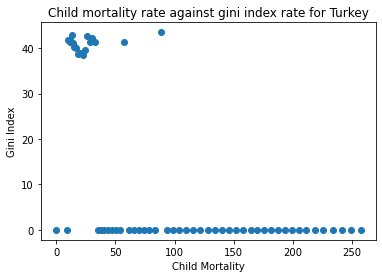

In [177]:
plt.scatter(c['Value'],g['Value'])
plt.xlabel('Child Mortality')
plt.ylabel('Gini Index')
plt.title("Child mortality rate against gini index rate for Turkey")

I don't see a relation.

Text(0.5, 1.0, 'Female literacy rate against gini index rate for Turkey')

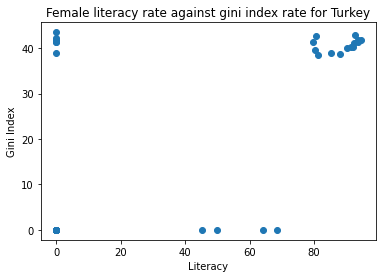

In [176]:
plt.scatter(w['Value'],g['Value'])
plt.xlabel('Literacy')
plt.ylabel('Gini Index')
plt.title("Female literacy rate against gini index rate for Turkey")

I don't see a relation.